In [1]:
import pandas as pd
from conceptualDesign.conceptualDesign import conceptualDesign
from misc.openData import openData
from misc.materials import load_materials
import matplotlib.pyplot as plt
import numpy as np
from designSpace import optimize_altitude

In [4]:
def vary_parameter(param_to_vary, param_bounds, param_steps, param_is_log=False, should_opt_altitude=True, altitude_bnds=(1000, 11000), iters_per_result=1000):

    """
    Vary the specified parameter (specified by a string) within the bounds specified, for the specified number of steps
    Optionally the altitude may be optimized for each value of the parameter, and a logarithmic scale may be specified for the param
    """
    if param_is_log:
        param_range = np.logspace(np.log10(param_bounds[0]), np.log10(param_bounds[1]), num=param_steps, base=10)
    else:
        param_range = np.linspace(param_bounds[0], param_bounds[1], num=param_steps, base=10)
    
    data = pd.DataFrame()
    material_data: dict = load_materials()
    for param in param_range:
        
        parameters = openData("design1")
        parameters[param_to_vary] = param
        if should_opt_altitude:
            parameters["altitude"] = optimize_altitude(bnds=[altitude_bnds])
        params, _ = conceptualDesign(parameters, material_data, iters_per_result)
        data = data.append(params, ignore_index=True)
    
    return data

In [44]:
dataVaryCR = vary_parameter("compressionRatio", (1.1, 250), param_steps=20, altitude_bnds=(1000, 6000), param_is_log=True)

/Users/sasha/Documents/code/repos/AE3200DSE/conceptualDesign/initializeParameters.py:29: RuntimeWarning: invalid value encountered in double_scalars
  rootChord = 2 * params["wingArea"] / ( span * (1 + params["wingTaperRatio"]))


41211.34411918208 2.5 5000000 100
41211.34411913815 2.5 5000000 100
41202.65377061382 2.5 5000000 100
41202.65377056991 2.5 5000000 100
41159.27964328263 2.5 5000000 100
41159.279643238806 2.5 5000000 100
40944.23387803736 2.5 5000000 100
40944.23387799402 2.5 5000000 100
39914.70639966508 2.5 5000000 100
39914.70639962404 2.5 5000000 100
35785.656916541404 2.5 5000000 100
35785.65691651087 2.5 5000000 100
31596.65791829025 2.5 5000000 100
31596.657918303787 2.5 5000000 100
WARNING WING AREA IS NEGATIVE :  -2257.0135775297667


/Users/sasha/Documents/code/repos/AE3200DSE/conceptualDesign/wingSizing.py:46: RuntimeWarning: invalid value encountered in double_scalars
  span * params["wingArea"] / (params["thicknessOverChord"] * chord * wingLift * np.cos(c2))) ** 0.3


Diverged
nan 2.5 5000000 100
41211.34411918208 2.5 5000000 100
41211.34411913815 2.5 5000000 100
41202.65377061382 2.5 5000000 100
41202.65377056991 2.5 5000000 100
41159.27964328263 2.5 5000000 100
41159.279643238806 2.5 5000000 100
40944.23387803736 2.5 5000000 100
40944.23387799402 2.5 5000000 100
39914.70639966508 2.5 5000000 100
39914.70639962404 2.5 5000000 100
35785.656916541404 2.5 5000000 100
35785.65691651087 2.5 5000000 100
31596.65791829025 2.5 5000000 100
31596.657918303787 2.5 5000000 100
WARNING WING AREA IS NEGATIVE :  -103.72068437614985
Diverged
nan 2.5 5000000 100
41211.34411918208 2.5 5000000 100
41211.34411913815 2.5 5000000 100
41202.65377061382 2.5 5000000 100
41202.65377056991 2.5 5000000 100
41159.27964328263 2.5 5000000 100
41159.279643238806 2.5 5000000 100
40944.23387803736 2.5 5000000 100
40944.23387799402 2.5 5000000 100
39914.70639966508 2.5 5000000 100
39914.70639962404 2.5 5000000 100
35785.656916541404 2.5 5000000 100
35785.65691651087 2.5 5000000 100


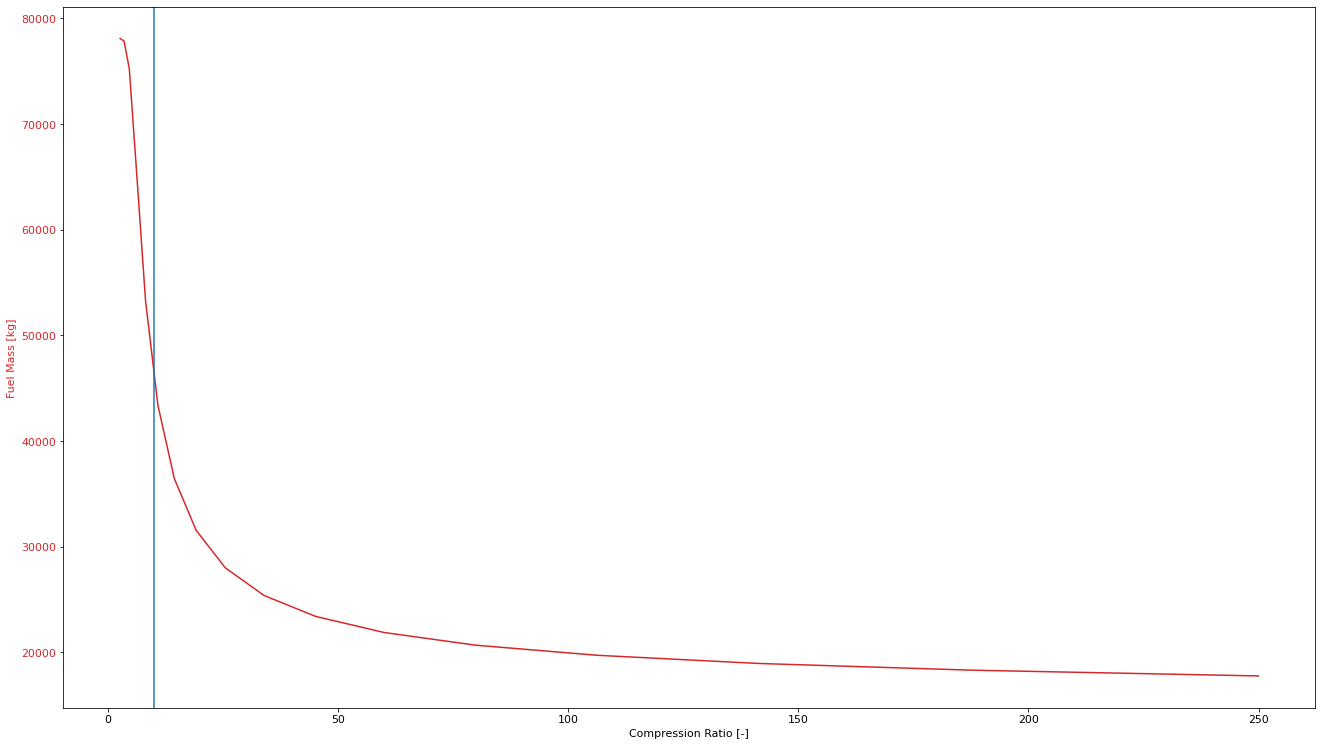

In [45]:
plot_1_thing(dataVaryCR["compressionRatio"], dataVaryCR["fuelMass"], "Fuel Mass [kg]", "Compression Ratio [-]")

In [22]:
def plot_1_thing(x, y, y_label, x_label, save_name=None):

    save_dir = './plots'
    plt.rcParams.update({'font.size': 11})

    fig, ax1 = plt.subplots()
    fig.set_size_inches(18.5, 10.5)

    color = 'tab:red'
    ax1.set_xlabel(x_label)
    ax1.set_ylabel(y_label, color=color)
    ax1.plot(x, y, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax1.axvline(10)

    fig.tight_layout()
    plt.show()

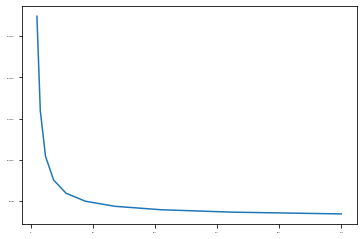

In [8]:
plt.plot(dataVaryCR["compressionRatio"], dataVaryCR["balloonStructuralMass"])

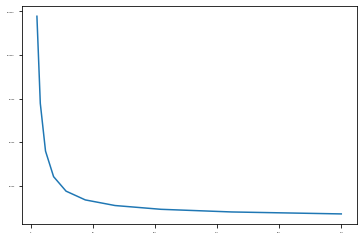

In [9]:
plt.plot(dataVaryCR["compressionRatio"], dataVaryCR["wingStructuralMass"])

In [14]:
dataRange = data

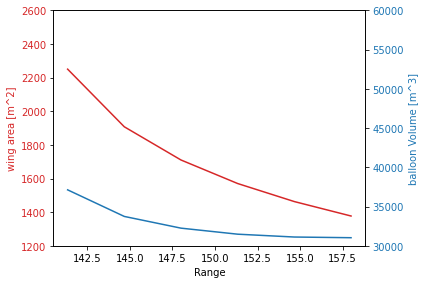

In [33]:
plot2things(data, "velocity")

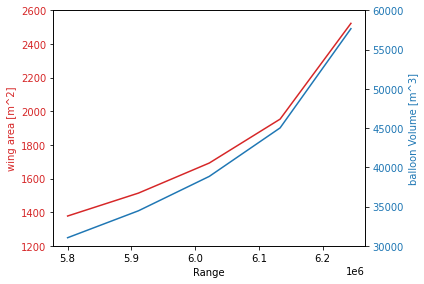

In [34]:
plot2things(dataRange, "flightRange")

In [32]:
def plot2things(data, x_axis):

  fig, ax1 = plt.subplots()

  color = 'tab:red'
  ax1.set_xlabel('Range')
  ax1.set_ylabel('wing area [m^2]', color=color)
  ax1.plot(data[x_axis], data["wingArea"], color=color)
  ax1.tick_params(axis='y', labelcolor=color)

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel('balloon Volume [m^3]', color=color)  # we already handled the x-label with ax1
  ax2.plot(data[x_axis], data["balloonVolume"], color=color)
  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  ax1.set_ylim([1200, 2600])
  ax2.set_ylim([30000, 60000])
  plt.show()

In [3]:
parameters = openData("design1")
material_data: dict = load_materials()
iters = 1000
params, df = conceptualDesign(parameters, material_data, iters)
df["liftRatio"] = df["balloonLift"] / (df["totalMass"] * 9.81)
df["balloonLength"] = df["balloonVolume"] / df["balloonArea"]
df[["fuelMass", "balloonStructuralMass", "balloonVolume"]]

NameError: name 'openData' is not defined

In [3]:
parameters = openData("design1")
material_data: dict = load_materials()
iters = 1000
params, df = conceptualDesign(parameters, material_data, iters)
df["liftRatio"] = df["balloonLift"] / (df["totalMass"] * 9.81)
df["balloonLength"] = df["balloonVolume"] / df["balloonArea"]
df[["fuelMass", "balloonVolume", "requiredEnergy", "totalMass", "balloonLift", "liftRatio", "balloonLength", "balloonArea", "wingArea", "fuselageStructuralMass", "totalDrag", "balloonStructuralMass"]]

  3%|███▌                                                                                                                             | 28/1000 [00:00<00:10, 95.50it/s]


,fuelMass,balloonVolume,requiredEnergy,totalMass,balloonLift,liftRatio,balloonLength,balloonArea,wingArea,fuselageStructuralMass,totalDrag,balloonStructuralMass
0,1767.904277,0.120609,2.138457e+11,99992.596770,0.0,0.0,1.896863,0.063583,277.882121,15399.469353,59598.796972,15.813261
1,1599.580307,213.225301,1.934852e+11,121361.377558,0.0,0.0,22.936234,9.296439,228.636790,13968.459405,53924.334683,27956.332569
2,1899.171937,192.923902,2.297238e+11,125450.233779,0.0,0.0,22.183899,8.696573,277.497301,15388.802828,64024.033519,25294.581611
3,1973.359331,229.057372,2.386975e+11,131528.308595,0.0,0.0,23.490412,9.751101,286.846623,15645.891852,66525.005692,30032.102397
4,2064.578226,238.005045,2.497314e+11,134670.342713,0.0,0.0,23.792382,10.003414,300.744367,16020.431308,69600.136240,31205.247047
5,2114.240470,249.006872,2.557385e+11,137140.266346,0.0,0.0,24.153476,10.309360,307.928745,16210.655226,71274.327532,32647.715296
6,2152.180719,254.996589,2.603278e+11,138733.668588,0.0,0.0,24.345610,10.474028,313.576317,16358.635694,72553.352216,33433.037331
7,2176.921079,259.572528,2.633204e+11,139856.549672,0.0,0.0,24.490375,10.598961,317.219691,16453.394916,73387.388153,34032.996412
8,2194.253956,262.556439,2.654170e+11,140616.625525,0.0,0.0,24.583861,10.680033,319.787200,16519.845883,73971.706349,34424.222195
9,2206.010568,264.646942,2.668390e+11,141140.681335,0.0,0.0,24.648935,10.736648,321.525142,16564.675111,74368.039963,34698.311517


In [4]:
df[['payloadMass', 'altitude', 'velocity', 'flightRange',
       'compressionRatio', 'balloonFinesseRatio', 
       'safetyFactor', 'propEfficiency', 'engineEfficiency',
       'fuelCellEfficiency', 'engineSpecificPower', 'fuelCellSpecificPower',
       'wingAlpha', 'wingC_L_alpha', 'liftFactor', 'wingC_D_0', 'wingC_D',
       'wingAspectRatio', 'wingDragCorrection', 'maxLoadFactor',
       'thicknessOverChord', 'wingQuarterChordSweep', 'wingHalfChordSweep',
       'wingTaperRatio', 'fuselageStructuralMass', 'wingStructuralMass',
       'balloonStructuralMass', 'fuelMass', 'liftingHydrogenMass',
       'propulsionMass', 'totalMass', 'balloonC_D', 'fuselageC_D',
       'wingC_L_design', 'fuselageArea', 'wingArea','requiredEnergy', 'totalDrag', 'balloonVolume']]

,payloadMass,altitude,velocity,flightRange,compressionRatio,balloonFinesseRatio,safetyFactor,propEfficiency,engineEfficiency,fuelCellEfficiency,...,propulsionMass,totalMass,balloonC_D,fuselageC_D,wingC_L_design,fuselageArea,wingArea,requiredEnergy,totalDrag,balloonVolume
0,60000.0,1000.0,140.0,10000000.0,100.0,10.0,1.4,0.5574,0.929,0.6,...,1278.520332,100497.791204,0.035,0.295,0.8,39.896974,150.426411,1.068257e+12,59544.668903,0.120609
1,60000.0,1000.0,140.0,10000000.0,100.0,10.0,1.4,0.5574,0.929,0.6,...,1555.976165,125956.840421,0.035,0.295,0.8,39.896974,124.393668,1.300083e+12,72466.650123,1065.158241
2,60000.0,1000.0,140.0,10000000.0,100.0,10.0,1.4,0.5574,0.929,0.6,...,1886.554967,140300.077109,0.035,0.295,0.8,39.896974,155.906246,1.576296e+12,87862.733236,1296.311677
3,60000.0,1000.0,140.0,10000000.0,100.0,10.0,1.4,0.5574,0.929,0.6,...,2108.088220,152510.740976,0.035,0.295,0.8,39.896974,173.659948,1.761396e+12,98180.225950,1571.722811
4,60000.0,1000.0,140.0,10000000.0,100.0,10.0,1.4,0.5574,0.929,0.6,...,2280.882666,161498.255159,0.035,0.295,0.8,39.896974,188.774004,1.905773e+12,106227.800780,1756.286141
5,60000.0,1000.0,140.0,10000000.0,100.0,10.0,1.4,0.5574,0.929,0.6,...,2408.791855,168347.901132,0.035,0.295,0.8,39.896974,199.898525,2.012647e+12,112184.929614,1900.244296
6,60000.0,1000.0,140.0,10000000.0,100.0,10.0,1.4,0.5574,0.929,0.6,...,2504.871713,173483.671709,0.035,0.295,0.8,39.896974,208.376847,2.092926e+12,116659.667459,2006.807738
7,60000.0,1000.0,140.0,10000000.0,100.0,10.0,1.4,0.5574,0.929,0.6,...,2576.608420,177341.112093,0.035,0.295,0.8,39.896974,214.733776,2.152865e+12,120000.669072,2086.853592
8,60000.0,1000.0,140.0,10000000.0,100.0,10.0,1.4,0.5574,0.929,0.6,...,2630.229188,180229.976159,0.035,0.295,0.8,39.896974,219.508420,2.197667e+12,122497.955012,2146.618731
9,60000.0,1000.0,140.0,10000000.0,100.0,10.0,1.4,0.5574,0.929,0.6,...,2670.270902,182391.976271,0.035,0.295,0.8,39.896974,223.084184,2.231123e+12,124362.822194,2191.291155


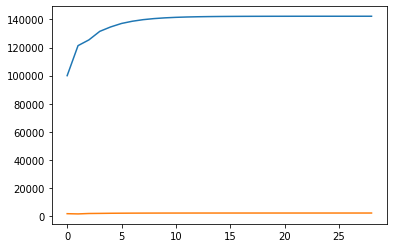

In [4]:
plt.plot(df.index, df.totalMass, df.fuelMass)